In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sigma = 74 #, dyn/cm

phi_lab = 0.17
K_lab = 74 #md

phi = 0.21#porosity

K = 110 #md

pc_lab = {'Sw':[1.0,0.5,0.4,0.3,0.25],
      'Pc_lab':[0,5,8.5,16,35]}

df = pd.DataFrame(pc_lab)

In [9]:
df

,Sw,Pc_lab
0,1.00,0.0
1,0.50,5.0
2,0.40,8.5
3,0.30,16.0
4,0.25,35.0


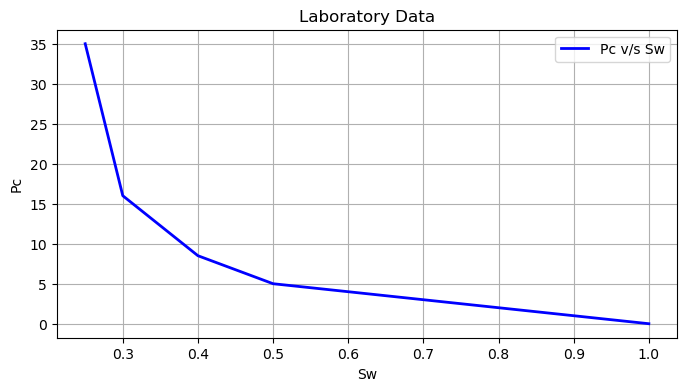

In [10]:
plt.style.use('default')

plt.figure(figsize=(8,4))

plt.plot(df['Sw'],df['Pc_lab'],label='Pc v/s Sw',color='blue',linewidth=2)

plt.title('Laboratory Data')
plt.xlabel('Sw')
plt.ylabel('Pc')

plt.legend()

plt.grid()

### Now we have to convert this lab data to reserevoir data and it is done by Leverett J function

$ J(Sw)=0.21645*Pc/\sigma*\sqrt{Pc/\phi} $

In [11]:
df['J'] = 0.21645*(df['Pc_lab']/sigma)*(np.sqrt(K_lab/phi_lab))
df

,Sw,Pc_lab,J
0,1.00,0.0,0.000000
1,0.50,5.0,0.305132
2,0.40,8.5,0.518724
3,0.30,16.0,0.976421
4,0.25,35.0,2.135922


In [13]:
df['Pc_reservoir'] = (df['J']*sigma)/(0.21645*np.sqrt(K/phi))

In [14]:
df

,Sw,Pc_lab,J,Pc_reservoir
0,1.00,0.0,0.000000,0.000000
1,0.50,5.0,0.305132,4.558004
2,0.40,8.5,0.518724,7.748607
3,0.30,16.0,0.976421,14.585613
4,0.25,35.0,2.135922,31.906028


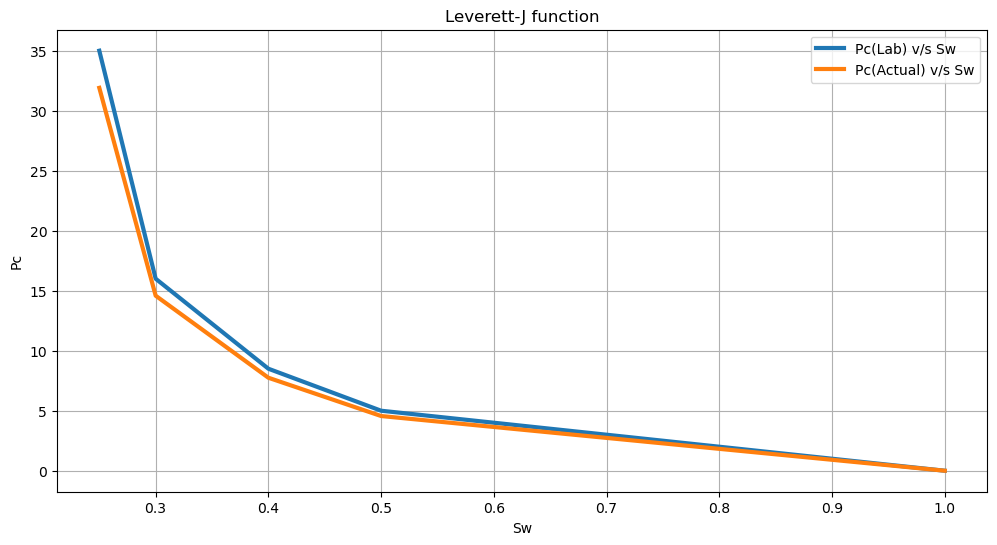

In [15]:
plt.style.use('default')

plt.figure(figsize=(12,6))

plt.plot(df['Sw'],df['Pc_lab'],label='Pc(Lab) v/s Sw',linewidth=3)
plt.plot(df['Sw'],df['Pc_reservoir'],label='Pc(Actual) v/s Sw',linewidth=3)

plt.title('Leverett-J function')
plt.xlabel('Sw') #  fraction
plt.ylabel('Pc') # psi

plt.legend()

plt.grid()